In [3]:
import os
import numpy as np
from PIL import Image

def load_images_from_directory(directory, target_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if '_mask' in filename:
            continue
        image_path = os.path.join(directory, filename)
        try:
            img = Image.open(image_path)
            img = img.convert('RGB')
            img = img.resize(target_size)
            img_array = np.array(img)
            images.append(img_array)

            if 'malignant' in directory:
                labels.append(1)
            elif 'benign' in directory:
                labels.append(0)
            else:
                labels.append(2)
        except Exception as e:
            print(f"Error processing {filename}: {e}")
    
    return np.array(images), np.array(labels)

base_directory = "C:\\Users\\Lenovo\\OneDrive\\Desktop\\raj\\Ultra_Soung\\Dataset_BUSI_with_GT"
normal_dir = os.path.join(base_directory, 'normal')
malignant_dir = os.path.join(base_directory, 'malignant')
benign_dir = os.path.join(base_directory, 'benign')

normal_images, normal_labels = load_images_from_directory(normal_dir)
malignant_images, malignant_labels = load_images_from_directory(malignant_dir)
benign_images, benign_labels = load_images_from_directory(benign_dir)

all_images = np.concatenate((normal_images, malignant_images, benign_images), axis=0)
all_labels = np.concatenate((normal_labels, malignant_labels, benign_labels), axis=0)

print(f"Loaded {all_images.shape[0]} images for training.")

# 0- benign 1- malignant 2-normal

Loaded 780 images for training.


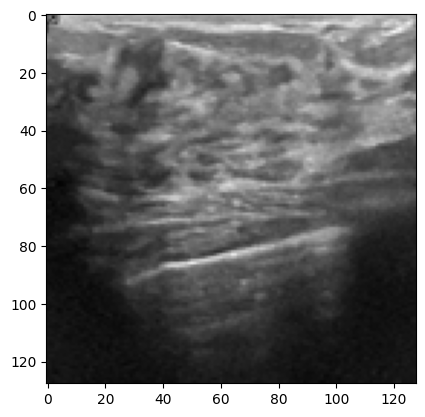

In [6]:
import matplotlib.pyplot as plt
plt.imshow(all_images[0])

In [9]:
all_images=all_images/255

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

In [41]:
X_train[0]

array([[[0.2745098 , 0.2745098 , 0.2745098 ],
        [0.34509804, 0.34509804, 0.34509804],
        [0.41176471, 0.41176471, 0.41176471],
        ...,
        [0.85882353, 0.85882353, 0.85882353],
        [0.86666667, 0.86666667, 0.86666667],
        [0.8745098 , 0.8745098 , 0.8745098 ]],

       [[0.34117647, 0.34117647, 0.34117647],
        [0.43529412, 0.43529412, 0.43529412],
        [0.38823529, 0.38823529, 0.38823529],
        ...,
        [0.82745098, 0.82745098, 0.82745098],
        [0.82745098, 0.82745098, 0.82745098],
        [0.77647059, 0.77647059, 0.77647059]],

       [[0.29019608, 0.29019608, 0.29019608],
        [0.28627451, 0.28627451, 0.28627451],
        [0.39215686, 0.39215686, 0.39215686],
        ...,
        [0.78039216, 0.78039216, 0.78039216],
        [0.76862745, 0.76862745, 0.76862745],
        [0.70196078, 0.70196078, 0.70196078]],

       ...,

       [[0.08627451, 0.08627451, 0.08627451],
        [0.10588235, 0.10588235, 0.10588235],
        [0.09019608, 0

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=3)  # 3 classes: benign, malignant, normal
y_test = to_categorical(y_test, num_classes=3)

In [49]:
y_train

array([[[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]],

       ...,

       [[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]],

       [[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.]]], dtype=float32)

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model.fit(X_train, y_train, epochs=18, batch_size=32, validation_data=(X_test, y_test))
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/18
20/20 [==============================] - 14s 674ms/step - loss: 1.0016 - accuracy: 0.5449 - val_loss: 0.9651 - val_accuracy: 0.5513
Epoch 2/18
20/20 [==============================] - 11s 562ms/step - loss: 0.9401 - accuracy: 0.5689 - val_loss: 0.8740 - val_accuracy: 0.6026
Epoch 3/18
20/20 [==============================] - 10s 495ms/step - loss: 0.8287 - accuracy: 0.6378 - val_loss: 0.7933 - val_accuracy: 0.6731
Epoch 4/18
20/20 [==============================] - 16s 781ms/step - loss: 0.7673 - accuracy: 0.6747 - val_loss: 0.7774 - val_accuracy: 0.6218
Epoch 5/18
20/20 [==============================] - 11s 552ms/step - loss: 0.6881 - accuracy: 0.6875 - val_loss: 0.6880 - val_accuracy: 0.6987
Epoch 6/18
20/20 [==============================] - 10s 484ms/step - loss: 0.6139 - accuracy: 0.7292 - val_loss: 0.6854 - val_accuracy: 0.7179
Epoch 7/18
20/20 [==============================] - 12s 617ms/step - loss: 0.5355 - accuracy: 0.7788 - val_loss: 0.6560 - val_accuracy: 0.7436

In [19]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)

model2 = Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
    layer.trainable = False

model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=18, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/18
20/20 [==============================] - 43s 2s/step - loss: 1.0622 - accuracy: 0.5080 - val_loss: 0.9343 - val_accuracy: 0.5513
Epoch 2/18
20/20 [==============================] - 40s 2s/step - loss: 0.9453 - accuracy: 0.5689 - val_loss: 0.8873 - val_accuracy: 0.5513
Epoch 3/18
20/20 [==============================] - 42s 2s/step - loss: 0.8934 - accuracy: 0.5929 - val_loss: 0.8488 - val_accuracy: 0.5962
Epoch 4/18
20/20 [==============================] - 39s 2s/step - loss: 0.8517 - accuracy: 0.6122 - val_loss: 0.8069 - val_accuracy: 0.6410
Epoch 5/18
20/20 [==============================] - 39s 2s/step - loss: 0.8254 - accuracy: 0.6346 - val_loss: 0.7880 - val_accuracy: 0.6538
Epoch 6/18
20/20 [==============================] - 42s 2s/step - loss: 0.7874 - accuracy: 0.6603 - val_loss: 0.7739 - val_accuracy: 0.6795
Epoch 7/18
20/20 [==============================] - 41s 2s/step - loss: 0.7701 - accuracy: 0.6538 - val_loss: 0.7490 - val_accuracy: 0.7179
Epoch 8/18
20/20 [==

In [20]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

5/5 [==============================] - 8s 2s/step - loss: 0.6361 - accuracy: 0.7949
Test Accuracy: 79.49%


In [50]:
from sklearn.metrics import classification_report
import numpy as np

y_test = np.argmax(y_test, axis=1)

y_pred_cnn = model.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

y_pred_model2 = model2.predict(X_test)
y_pred_model2 = np.argmax(y_pred_model2, axis=1)

print("Classification Report for CNN Model:")
print(classification_report(y_test, y_pred_cnn))

print("Classification Report for ImageNet-based Model (Transfer Learning):")
print(classification_report(y_test, y_pred_model2))


5/5 [==============================] - 6s 1s/step
Classification Report for CNN Model:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        86
           1       0.67      0.76      0.71        42
           2       0.81      0.61      0.69        28

    accuracy                           0.78       156
   macro avg       0.77      0.74      0.75       156
weighted avg       0.78      0.78      0.77       156

Classification Report for ImageNet-based Model (Transfer Learning):
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        86
           1       0.75      0.64      0.69        42
           2       0.79      0.68      0.73        28

    accuracy                           0.79       156
   macro avg       0.78      0.74      0.76       156
weighted avg       0.79      0.79      0.79       156



In [56]:
v=model.predict(X_test)
print(np.argmax(v[5]))
v2=model.predict(X_test)
np.argmax(v2[5])


5/5 [==============================] - 0s 88ms/step
1
5/5 [==============================] - 0s 82ms/step


1

In [58]:

model.save('cnn_model1.h5')  
model2.save('imagenet_model2.h5')  


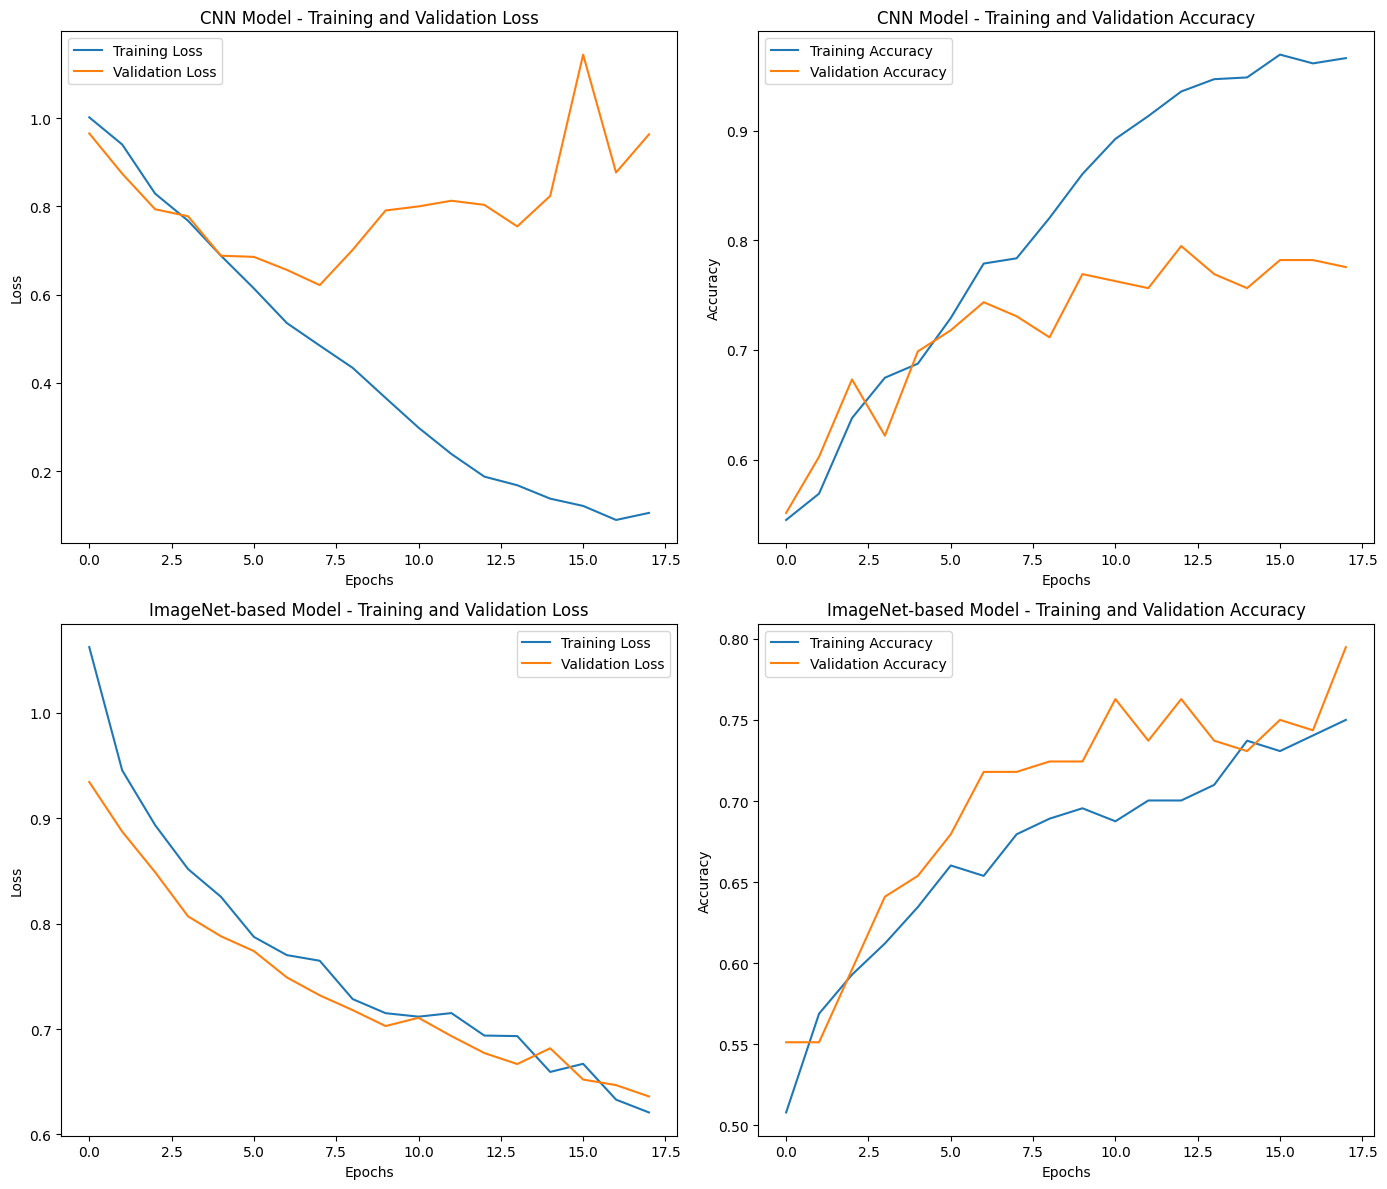

In [61]:
import matplotlib.pyplot as plt

# Set up the figure for plotting both models in the same layout
plt.figure(figsize=(14, 12))

# Plotting Training and Validation Loss for CNN model (history1)
plt.subplot(2, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('CNN Model - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Accuracy for CNN model (history1)
plt.subplot(2, 2, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training and Validation Loss for ImageNet-based model (history2)
plt.subplot(2, 2, 3)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('ImageNet-based Model - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Accuracy for ImageNet-based model (history2)
plt.subplot(2, 2, 4)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('ImageNet-based Model - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

# Save the figure as an image file
plt.savefig('model_comparison_plots.png')

# Show the plot
plt.show()
